# Class: Robot Movements :: Homework

In [1]:
# Parameters of the structure of the robot
class Robot(object):
    def __init__(self, R, L, N):
        self.R = R # radius of the wheel
        self.L = L # lenght between wheels
        self.N = N # number of ticks per revolution in the encoder
                
    def set_position(self, x, y, angle, tl, tr):
        self.x = x         # position of the robot in X
        self.y = y         # position of the robot in Y
        self.angle = angle # angle $\theta$ of the robot
        self.tl = tl       # number of ticks performed in left wheel 
        self.tr = tr       # number of ticks performed in right wheel 
        
robot = Robot(0.05, 0.2, 16)

## Control the wheel and velocity of a diff robot
    - Inputs: linear and angular velocities (Twist)
    - Output: vl and vr
    
    
$$v_r = \frac{2v + \omega L}{2R} \ \ \ \ v_l = \frac{2v - \omega L}{2R} \ \ \ \ \ \ \ \ \ \ $$

In [2]:
def wheels_velocity(R, L, v, w):
    """
    Given the radius of the wheel, the lenght between wheels, 
    the speed (v) and the angular velocity (w), calculates the 
    velocity of each wheel (vr and vl)
    """
    vl = (2.0*v - w*L)/(2*R)
    vr = (2.0*v + w*L)/(2*R)
    return vl, vr

In [3]:
# Testing wheels velocity
v = 0.05
w = 0.5

vl, vr = wheels_velocity(robot.R, robot.L, v, w)
print 'Velocity of left wheel: ', vl
print 'Velocity of right wheel: ', vr

Velocity of left wheel:  0.0
Velocity of right wheel:  2.0


## Estimate the new pose of a diff robot based on wheel encoder
    - Inputs: current pose, ticks, L and R
    - Output: new pose
    
New pose is given by the following equations:

$$ x' = x + \frac{\pi R}{N}(\Delta t_l + \Delta t_r)cos\theta $$
$$ y' = y + \frac{\pi R}{N}(\Delta t_l + \Delta t_r)sin\theta $$
$$\theta ' = \theta + \frac{Dr - Dl}{L} \ \ \ \ \ \ D_{side} = 2\pi R\frac{\Delta tick}{N}$$

In [4]:
from math import pi, sin, cos

def calculate_position(robot, ticks_l, ticks_r):
    #compute the distance a wheel of given radius travels
    dticks_r = ticks_r - robot.tl
    dticks_l = ticks_l - robot.tr

    Dr = (2.0*pi*robot.R*dticks_r)/robot.N
    Dl = (2.0*pi*robot.R*dticks_l)/robot.N

    #print("Distance traveled by the right wheel: %.2f" % Dr)
    #print("Distance traveled by the left wheel: %.2f" % Dl)

    x = robot.x + ((pi*robot.R)*(dticks_l + dticks_r)*cos(robot.angle))/robot.N
    y = robot.y + ((pi*robot.R)*(dticks_l + dticks_r)*sin(robot.angle))/robot.N
    angle = (robot.angle + (Dr - Dl)/float(robot.L)) % 360
    
    return x, y, angle

In [5]:
# Add initial position to the robot as (x, y, angle, tl, tr)
robot.set_position(10.0, 10.0, 45.0, 0, 0)

# Calculate the position of the robot after 300 ticks in left wheel 
# and 800 ticks in the right wheel
x, y, angle = calculate_position(robot, 300, 800)
print("X position: %.2f" % x)
print("Y position: %.2f" % y)
print("Orientation: %.2f" % angle)

X position: 15.67
Y position: 19.19
Orientation: 94.09


## Illustrate initial and final positions

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_robots_init_end(x_init, y_init, theta_init, x_end, y_end, theta_end): 
    # set axis
    middle_x = (x_end - x_init)/2
    xmin = x_init - middle_x
    xmax = x_end + middle_x
    middle_y = (y_end - y_init)/2
    ymin = y_init - middle_y
    ymax = y_end + middle_y

    fig = plt.figure()
    plt.axis((xmin, xmax, ymin, ymax))
    plt.text(x_init, y_init, "X", size=10, rotation=theta_init,
             ha="center", va="center",
             bbox=dict(boxstyle="rarrow", 
                       ec=(1., 0.5, 0.5), 
                       fc=(1., 0.8, 0.8))
    )
    plt.text(x_end, y_end, "X", size=10, rotation=theta_end,
             ha="center", va="center",
             bbox=dict(boxstyle="rarrow", 
                       ec=(1., 0.5, 0.5), 
                       fc=(1., 0.8, 0.8))
    )
    plt.draw()
    plt.show()

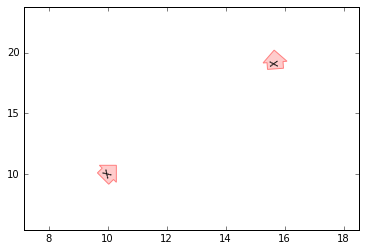

In [8]:
# Illustrate both positions of the robot
plot_robots_init_end(robot.x, robot.y, robot.angle, x, y, angle)

In [9]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt

def plot_interval(robot, t_final):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()

    # initial position of the robot
    x, y, theta = robot.x, robot.y, robot.angle

    # set a reasonable delta t
    t = 0.0
    delta_t = 0.125 

    # start a list of x/y pairs to plot
    points_x = [robot.x]
    points_y = [robot.y]

    # simulate the desired amount of time
    while t < t_final:

        # keep ticks constant 
        ticks_l, ticks_r = 1, 3
        
        x, y, angle = calculate_position(robot, ticks_l, ticks_r)
        robot.set_position(x, y, angle, 0, 0)

        # time update
        t += delta_t

        # add x, y point
        points_x.append(x)
        points_y.append(y)

        ax.clear()
        ax.plot(points_x, points_y, 'rx-')
        fig.canvas.draw()
        time.sleep(0.1)
        # make sure circles look like circles
        plt.axis('equal')

<IPython.core.display.Javascript object>


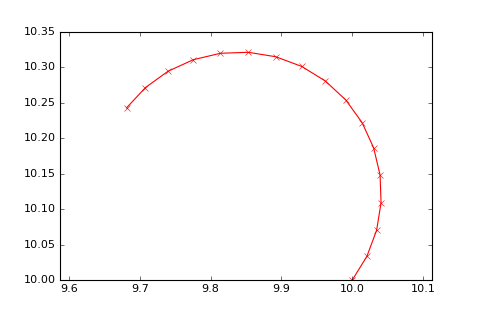

<IPython.core.display.Javascript object>


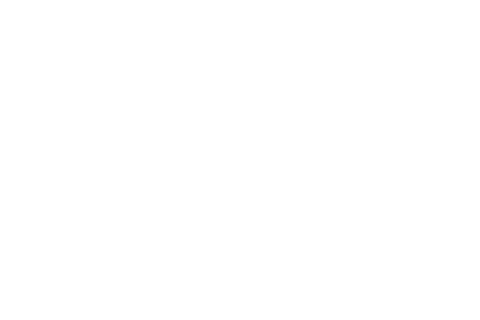

In [13]:
# Test the interval
robot = Robot(0.05, 0.2, 16)
# Add initial position to the robot as (x, y, angle, tl, tr)
robot.set_position(10.0, 10.0, 45.0, 0, 0)

plot_interval(robot, 2.0)

[Example in ROS](https://goo.gl/D46TwQ)

In [ ]:
#!/usr/bin/env python
# source: http://answers.ros.org/question/29706/twist-message-example-and-cmd_vel/
import roslib; #roslib.load_manifest('YOUR_PACKAGE_NAME_HERE')
import rospy
import tf.transformations
from geometry_msgs.msg import Twist

def callback(msg):
    rospy.loginfo("Received a /cmd_vel message!")
    rospy.loginfo("Linear Components: [%f, %f, %f]"%(msg.linear.x, msg.linear.y, msg.linear.z))
    rospy.loginfo("Angular Components: [%f, %f, %f]"%(msg.angular.x, msg.angular.y, msg.angular.z))

    # Do velocity processing here:
    # Use the kinematics of your robot to map linear and angular velocities into motor commands

    v_l = ...
    v_r = ...

    # Then set your wheel speeds (using wheel_left and wheel_right as examples)
    wheel_left.set_speed(v_l)
    wheel_right.set_speed(v_r)

def listener():
    rospy.init_node('cmd_vel_listener')
    rospy.Subscriber("/cmd_vel", Twist, callback)
    rospy.spin()

if __name__ == '__main__':
    listener()